In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
print(train.shape, test.shape)

(891, 12) (418, 11)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##2. Age에 대한 정보를 그냥 중앙값으로 채웠는데, 생각해보니 Age값 자체보다 나이대별로 구분한 정보가 더 도움이 많이 될 것 같다는 판단을 했습니다. 결측치를 채우지 않은 상태에서 나이에 대한 histogram을 그린 뒤에 적절한 구간을 정해서 4개의 서로 다른 나이대로 데이터를 변환하세요. 이 때 구간을 설정하는 것은 histogram을 보고 분석가의 의견에 따라 결정하세요. 그 이유도 함께 서술하세요. 예를 들면, 0 ~ 13세 | 13 ~ 25세 | 25 ~ 40세 | 40세 이상 이렇게 나누었다고 했을 때 원본 데이터는 다음과 같은 코드에 의해 변환될 수 있습니다.



```
# data['Age'] column에 나이 정보가 있다고 가정.
data.loc[data.Age < 13, 'Age'] = 'low'
data.loc[(data.Age >= 13) & (data.Age < 25), 'Age'] = 'mid1'
data.loc[(data.Age >= 25) & (data.Age < 40), 'Age'] = 'mid2'
data.loc[(data.Age >= 40), 'Age'] = 'high'
```




In [ ]:
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

<Axes: xlabel='Age', ylabel='Count'>

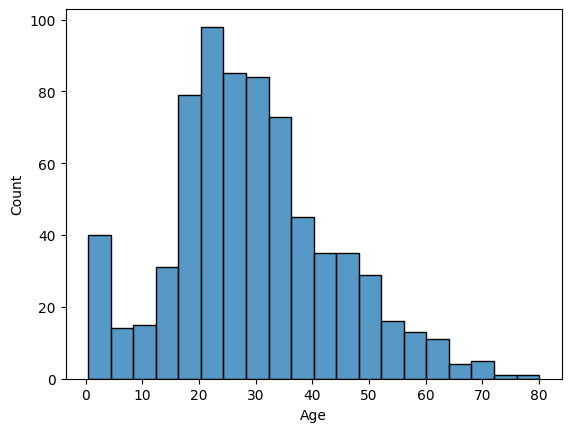

In [ ]:
#train.Age = train.Age.fillna(train.Age.median())       --> 실습코드에서의 원래 코드

#결측치 채우지 않은 상태에서 histogram 그리기
sns.histplot(train['Age'])

나이를 이용하여 생존자를 예측하기 위해, 구간을 생존율과 관련한 특징을 생각하여 나누는 것이 필요할 것이다.

나이와 생존을 연결시켜 생각해보면, 가장 먼저 생각나는 관용적인 생각이 "어린이와, 노약자 먼저"가 될 것이다. 또한, 그들의 대피를 많은 20 ~ 50대의 사람들이 도와주는 것을 생각할 수 있다.

또한, 20 ~ 50대 사람들의 생존과 관련한 특징을 생각해 보았을 때, 승객 중 가족의 유무와 같은 것이 있을 듯 하다. 일반적으로 보았을 때, 20 ~ 30대 같은 경우, 배우자 혹은, 아이와 같은 가족들과 함께 승선했을 확률이 적지만, 30 ~ 50대 같은 경우 가족들과 함께 승선했을 확률이 존재한다.

위와 같은 생각을 토대로, 20 ~ 50대 사람들을 두 집단으로 분류를 한다면 20 ~ 30대와 30 ~ 50대와 같이 분류하는 것이 적절할 것으로 생각된다.

위와 같이 승객의 나이를 히스토그램으로 나타낸 것을 참고하면, 10대 후반에서 급격하게 차이가 있으니, 0 ~ 17세로 첫 번째 구간으로 정할 수 있을 것이다. 그리고, 위와 같이 생각한 것을 토대로 18 ~ 30세로 두 번째 구간을 정하자. 세 번째 구간은 31 ~ 50세로 정하고, 51세 이상을 네 번째로 정하자.

즉, "0 ~ 17세 | 18 ~ 30세 | 31 ~ 50세 | 51세 이상"으로 나이의 구간을 나누자.

In [ ]:
age_tmp = train['Age'].copy()
age_tmp = pd.to_numeric(age_tmp, errors='coerce')
#replace any invalid numeric values (like the string labels we introduced) with NaN (Not a Number).

#'Age'col의 datatype를 float에서 문자열로 변경하기(에러메세지 뜸)
train['Age']=train['Age'].astype(str)

#train.loc[row_label, col_label]=value --> row_label, col_label에 해당하는 것을 value로 바꾸는 것
train.loc[age_tmp <= 17, 'Age'] = 'low'
train.loc[(age_tmp > 17) & (age_tmp <= 30), 'Age'] = 'mid1'
train.loc[(age_tmp > 30) & (age_tmp <= 50), 'Age'] = 'mid2'
train.loc[(age_tmp > 50), 'Age'] = 'high'
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  mid1      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  mid2      1   
2                               Heikkinen, Miss. Laina  female  mid1      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  mid2      1   
4                             Allen, Mr. William Henry    male  mid2      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  mid1      0   
887                       Graham, Miss. Margaret Edith  female  mid1      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   nan      1   
889                              Behr, Mr. Karl Howell    male  mid1      0   
890                                Dooley, Mr. Patrick    male  mid2      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]